# Data Pre-Processing and Exploration

## Import Libraries

These are the main libraries used for data exploration:
+ `numpy`: used for mathematical operations on matrices
+ `pandas`: used to store data from `.csv` files and operate functions on DataFrame
+ `matplotlib`: used to visualize data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import re
import datetime as dt
pd.options.mode.chained_assignment = None

## Exploring Data (rows, cols, dtype)

### Read data from file `.csv`

In [2]:
manga_df = pd.read_csv('../data/comic.csv')

In [3]:
manga_df.head()

,Title,Score,Vote,Ranked,Popularity,Members,Favorite,Volumes,Chapters,Status,Published,Genres,Themes,Author,Total Review,Type Review
0,Berserk,9.47,330815,1,1,"664,507","122,709",Unknown,Unknown,Publishing,"Aug 25, 1989 to ?","['Action', 'Adventure', 'Award Winning', 'Dram...","['Gore', 'Military', 'Mythology', 'Psychologic...","Miura, Kentarou (Story & Art), Studio Gaga (Art)",258,"[233, 15, 10]"
1,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,9.30,156218,2,26,"255,895","42,837",24,96,Finished,"Jan 19, 2004 to Apr 19, 2011","['Action', 'Adventure', 'Mystery', 'Supernatur...",[],"Araki, Hirohiko (Story & Art)",128,"[120, 7, 1]"
2,Vagabond,9.24,136151,3,15,"364,337","40,091",37,327,On Hiatus,"Sep 3, 1998 to May 21, 2015","['Action', 'Adventure', 'Award Winning']","['Historical', 'Samurai']","Inoue, Takehiko (Story & Art), Yoshikawa, Eiji...",96,"[88, 7, 1]"
3,One Piece,9.22,366300,4,3,"598,654","114,423",Unknown,Unknown,Publishing,"Jul 22, 1997 to ?","['Action', 'Adventure', 'Fantasy']",[],"Oda, Eiichiro (Story & Art)",206,"[173, 17, 16]"
4,Monster,9.15,93811,5,29,"236,041","20,484",18,162,Finished,"Dec 5, 1994 to Dec 20, 2001","['Award Winning', 'Drama', 'Mystery']","['Adult Cast', 'Psychological']","Urasawa, Naoki (Story & Art)",76,"[64, 7, 5]"


### Total number of rows and columns of data

In [4]:
n_rows , n_cols = manga_df.shape
print(f'Data has {n_rows} rows and {n_cols} columns')

Data has 5000 rows and 16 columns


### Meaning of each row and each column

+ Each rows represents information about a manga series

+ The following is the meaning of each column in the data

  | **COLUMN**            | **MEANING**                                                                                     |
  |:----------------------|:------------------------------------------------------------------------------------------------|
  |**`Title`**            | Title of the manga (written in English phonetic)                                                |
  |**`Score`**            | Score on the MyAnimeList site (MAL)                                                             |
  |**`Vote`**             | Number of readers voting for the manga                                                          |
  |**`Ranked`**           | Ranking of manga on the web MyAnimeList (MAL)                                                   |
  |**`Popularity`**       | The popularity of the manga                                                                     |
  |**`Members`**          | Number of readers who have this manga in their list                                             |
  |**`Favorite`**         | Number of readers who love this manga                                                           |
  |**`Volumes`**          | Volume number of the manga                                                                      |
  |**`Chapters`**         | Chapter number of the manga                                                                     |
  |**`Status`**           | Status of the manga (ongoing, completed, on hiatus,...)                                         |
  |**`Published`**        | Release time to the end time of the manga                                                       |
  |**`Genres`**           | Genres of manga                                                                                 |
  |**`Themes`**           | The themes of the manga                                                                         |
  |**`Author`**           | Author information of the manga                                                                 |
  |**`Total Review`**     | Number of readers leaving comments on the manga                                                 |
  |**`Type Review`**      | Number of readers for each comment category (Recommended / Mixed feeling / Not recommended)     |
  

### Check and handle duplicates

In [5]:
duplicated_rows = manga_df.duplicated().sum()

if duplicated_rows == 0:
    print('There are 0 rows that are duplicated, which means each row in the DataFrame is unique.')
    print('So that we do not need to continue processing duplicate lines')
else:
    print(f'There are {duplicated_rows} rows that are duplicated so we need to drop those {duplicated_rows} rows')
    manga_df = manga_df.drop_duplicates()

There are 0 rows that are duplicated, which means each row in the DataFrame is unique.
So that we do not need to continue processing duplicate lines


### Check and handle data type of columns

Next, we calculate the data type (dtype) of each column in DataFrame `manga_df` and save the result into Series `dtypes` (This Series has the index as the column name).

In [6]:
dtypes = manga_df.dtypes
dtypes

Title            object
Score           float64
Vote              int64
Ranked            int64
Popularity        int64
Members          object
Favorite         object
Volumes          object
Chapters         object
Status           object
Published        object
Genres           object
Themes           object
Author           object
Total Review      int64
Type Review      object
dtype: object

To better understand columns of type `object`, we will analyze them into each subtype using function `open_object_dtype()`

In [7]:
def open_object_dtype(s):
    dtypes = set()
    dtypes.update(s.apply(type))
    return dtypes

Now, considering columns whose data type is object more clearly

In [8]:
manga_df[manga_df.dtypes.index[manga_df.dtypes == object]].apply(open_object_dtype)

Title                           {<class 'str'>}
Members                         {<class 'str'>}
Favorite                        {<class 'str'>}
Volumes                         {<class 'str'>}
Chapters                        {<class 'str'>}
Status                          {<class 'str'>}
Published                       {<class 'str'>}
Genres                          {<class 'str'>}
Themes                          {<class 'str'>}
Author         {<class 'str'>, <class 'float'>}
Type Review                     {<class 'str'>}
dtype: object

Let's see which columns have appropriate data types and which columns do not

+ Suitability: `Title`, `Score`, `Vote`, `Ranked`, `Popularity`, `Status` and `Total Review`

+ Need to convert to **int**: `Members`, `Favorite`, `Volumes` and `Chapters`

+ Need to convert to **list**: `Type Review`, `Genres` and `Themes`

+ Need to convert to **str**: `Author` 

+ Need to convert to **datetime**: `Published`

## Pre-processing data

### Normalizing columns (convert the data types of columns accordingly)

Firstly, converting the data type of the columns to **int / float**

In [9]:
# Convert to int
manga_df['Members'].replace(',','', regex=True, inplace=True)
manga_df['Favorite'].replace(',','', regex=True, inplace=True)
manga_df['Members'] = pd.to_numeric(manga_df['Members'], errors='coerce')
manga_df['Favorite'] = pd.to_numeric(manga_df['Favorite'], errors='coerce')

# Convert to float because type int does not contain NaN values
manga_df['Volumes'] = pd.to_numeric(manga_df['Volumes'], errors='coerce')
manga_df['Chapters'] = pd.to_numeric(manga_df['Chapters'], errors='coerce')


Let's check again data type of `Members`, `Favorite`, `Volumes` and `Chapters`

In [10]:
check = ['Members', 'Favorite', 'Volumes', 'Chapters']
manga_df[check].dtypes

Members       int64
Favorite      int64
Volumes     float64
Chapters    float64
dtype: object

Secondly, converting the data type of the columns to **list**

In [11]:
manga_df[['Genres', 'Themes', 'Type Review']] = \
    manga_df[['Genres', 'Themes', 'Type Review']].apply(lambda col : col.apply(ast.literal_eval), axis=1)

+ Looking at the `Type Review` column, we see that the data type of this column is quite difficult to access (the column's data type is a list of 3 numbers representing the number of comments of three comment types: `Recommended`, `Mixed feelings` and `Not recommended`) so we will divide `Type Review` into 3 new columns: `Recommended`, `Mixed Feelings` and `Not Recommended`. 
+ After dividing into 3 new columns, the `Type Review` column will be removed from the data. 
+ Additionally, the `Total Review` column which is the sum of those 3 new columns will also be removed

In [12]:
manga_df['Recommended'] = 0
manga_df['Mixed Feelings'] = 0
manga_df['Not Recommended'] = 0

for row, i in zip(manga_df['Type Review'], manga_df.index):
    manga_df['Recommended'][i] = row[0]
    manga_df['Mixed Feelings'][i] = row[1]
    manga_df['Not Recommended'][i] = row[2]

Before deleting column `Total Review`, we check whether the data collected is reasonable

In [13]:
def checking_reviews(df: pd.DataFrame) -> bool:
    return df["Total Review"].equals((df["Recommended"] + df["Mixed Feelings"] + df["Not Recommended"]))

In [14]:
checking_reviews(manga_df)==True

True

Because the `Total Review` column is the sum of the 3 columns we just created (checked to be True above), we will delete the `Total Review` column from the data.

In [15]:
manga_df = manga_df.drop(columns=['Type Review', 'Total Review'])

Let's check the data type of the 3 newly created columns

In [16]:
check = ['Recommended', 'Mixed Feelings', 'Not Recommended']
manga_df[check].dtypes

Recommended        int64
Mixed Feelings     int64
Not Recommended    int64
dtype: object

Thirdly, converting the data type of the columns to **datetime**

Because the `Published` column is quite difficult to store during discovery and continuing with the following steps (the data in the column is `release date to end date`), we will split the `Published` column into 2 new columns. is column `Release date` and column `Completed date` and remove column `Published`

In [17]:
start = []
end = []
for row in manga_df['Published']:
    try:
        s, e = row.split(' to ')
        start.append(s)
        end.append(e)
    except:
        s = np.nan
        e = np.nan
        start.append(s)
        end.append(e)

manga_df['Release date'] = pd.DataFrame(start)
manga_df['Completed date'] = pd.DataFrame(end)

manga_df['Release date'] = pd.to_datetime(manga_df['Release date'], format='%b %d, %Y', errors='coerce')
manga_df['Completed date'] = pd.to_datetime(manga_df['Completed date'], format='%b %d, %Y', errors='coerce')

manga_df = manga_df.drop(columns='Published')

Let's data type of `Release date` and `Completed date`

In [18]:
check = ['Release date', 'Completed date']
manga_df[check].dtypes

Release date      datetime64[ns]
Completed date    datetime64[ns]
dtype: object

Finally, converting the data type of the columns to **string**

In [19]:
# Converted to str, any value that is str remains the same and any value that is NaN is converted to an empty string
manga_df['Author'] = manga_df['Author'].replace(to_replace=np.nan, value='')

Now, checking all data type columns after conversion

In [20]:
manga_df.apply(open_object_dtype)

Title                                                {<class 'str'>}
Score                                              {<class 'float'>}
Vote                                                 {<class 'int'>}
Ranked                                               {<class 'int'>}
Popularity                                           {<class 'int'>}
Members                                              {<class 'int'>}
Favorite                                             {<class 'int'>}
Volumes                                            {<class 'float'>}
Chapters                                           {<class 'float'>}
Status                                               {<class 'str'>}
Genres                                              {<class 'list'>}
Themes                                              {<class 'list'>}
Author                                               {<class 'str'>}
Recommended                                          {<class 'int'>}
Mixed Feelings                    

## Exploring data (distribution of values)

### Distribution of numeric columns

Columns have numeric data types: 
+ `Score`
+ `Vote`
+ `Ranked`
+ `Popularity`
+ `Members`
+ `Favorite`
+ `Volumes`
+ `Chapters`
+ `Recommended`
+ `Mixed Feelings`
+ `Not Recommended`
+ `Release date`
+ `Completed date`

For columns with numeric data types, we will calculate:
- Percentage (from 0 to 100) of missing values
- The min
- The lower quartile 
- The median 
- The upper quartile 
- The max

We will save the results to a DataFrame `num_col_dist_df`, where:
- The names of the columns are the names of the numeric columns in `manga_df`
- Names of rows: "missing_ratio", "min", "lower_quartile", "median", "upper_quartile", "max"  


In [21]:
num_col_dist_df = manga_df[['Score','Vote','Ranked','Popularity','Members','Favorite','Volumes','Chapters','Recommended','Mixed Feelings','Not Recommended', 'Release date', 'Completed date']]

def missing_ratio(s):
    return (s.isna().mean() * 100)

def median(df):
    return (df.quantile(0.5))

def lower_quartile(df):
    return (df.quantile(0.25))

def upper_quartile(df):
    return (df.quantile(0.75))

num_col_dist_df = num_col_dist_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])
num_col_dist_df

,Score,Vote,Ranked,Popularity,Members,Favorite,Volumes,Chapters,Recommended,Mixed Feelings,Not Recommended,Release date,Completed date
missing_ratio,0.00,0.00,0.00,0.00,0.00,0.0,27.4,27.56,0.0,0.0,0.0,19.44,41.32
min,7.27,101.00,1.00,1.00,222.00,0.0,1.0,1.00,0.0,0.0,0.0,1962-12-03 00:00:00,1966-05-08 00:00:00
lower_quartile,7.39,540.00,1250.75,1642.75,2032.75,19.0,2.0,13.00,1.0,0.0,0.0,2007-06-04 06:00:00,2009-11-25 06:00:00
median,7.56,1459.50,2500.50,4200.00,4632.50,55.0,6.0,35.00,2.0,0.0,0.0,2012-12-13 12:00:00,2014-10-10 00:00:00
upper_quartile,7.81,4004.75,3750.25,8545.00,11640.00,211.0,12.0,80.00,5.0,1.0,0.0,2017-11-24 06:00:00,2018-12-15 00:00:00
max,9.47,400237.00,5001.00,31381.00,664507.00,122709.0,200.0,1957.00,280.0,56.0,112.0,2023-11-06 00:00:00,2023-11-25 00:00:00


As we can see:
+ About missing percentage:
    + All columns except `Volumes` and `Chapters` have full data
    
    + The column `Volumes` has **27.4%** of the total values missing. While the `Chapters` column is **27.6%**. It can be seen that the missing rate of these two columns is not too high and is acceptable. Columns `Volumes` and `Chapters` are missing mainly due to their `Status` (incomplete, on hold, on hiatus,...), because these two columns only display volume and chapter numbers when that set has ended (completed or stopped indefinitely).
    
    + `Release date` is missing 19.4% of the data, likely because the information is not available or the manga has not been released yet.
    
     + `Completed date` is missing a lot, more than 40%. The reason may be that the manga is not completed or there is no information.
     
+ About min, median, lower_quartile, upper_quartile and max:
     + Except for the `Score` column, numeric columns all have very wide ranges
     
     + The manga series in the data were all released between December 1962 and November 2023.
     
     + If the manga series in the data have been completed, they were all completed between May 1966 and November 2023.

In [22]:
# Missing manga volume number column grouped by status
np.unique(manga_df['Status'][manga_df['Volumes'].isna()], return_counts=True)

(array(['Discontinued', 'Finished', 'On Hiatus', 'Publishing'],
       dtype=object),
 array([   1,  211,    4, 1154], dtype=int64))

In [23]:
# Missing manga chapter number column grouped by status
np.unique(manga_df['Status'][manga_df['Chapters'].isna()], return_counts=True)

(array(['Discontinued', 'Finished', 'On Hiatus', 'Publishing'],
       dtype=object),
 array([   1,  210,   14, 1153], dtype=int64))

+ As mentioned above, the manga is missing chapters or volumes because it is not yet completed and are in progress (Publishing). `Chapters` and `Volumes` will be updated when the manga is completed or discontinued.

+ For manga that only have 'Chapters' but no 'Volumes', the biggest reason is one-shot manga series (series with only 1 chapter) so there will be no volumes. Such one-shot manga make up a large proportion on MAL.

+ For manga that only have 'Volumes' but no 'Chapters', the biggest reason is that light novels (light_novels or novels) are often published in volumes and the author does not divide chapters when writing. There are also many novel series on MAL.

Next, after identifying the basic statistical numbers that describe our data, we further need to determine the features that have a large number of missing values. Such features are not useful for the analysis stage and must be removed from the dataset.

We decided that if the percentage of missing values is greater than 75%, the column is dropped from the dataframe and an updated dataframe is returned.

In [24]:
def drop_missing_features(df: pd.DataFrame, missing_lst: dict = dict(num_col_dist_df.iloc[0]), threshold: float = 75.0) -> pd.DataFrame:
    if (df is None) or (missing_lst is None) or (threshold is None):
        print(f"[LOG] Invalid.")
        raise ValueError
    
    # Create a copy of the dataframe to avoid changing the original
    df_cp = df.copy()
    
    # List to maintain the columns to drop
    cols_to_trim = []
    
    for key, value in missing_lst.items():
        if float(value) > threshold:
            cols_to_trim.append(key)
            
    if len(cols_to_trim) > 0:
        # drop the columns identified using the dataframe drop() method
        df_cp = df_cp.drop(columns=cols_to_trim)
        print("[LOG] Dropped columns: " + " ".join(cols_to_trim))
    else:
        print("[LOG] Have no columns to trim.")
        
    return df_cp

In [25]:
manga_df = drop_missing_features(manga_df, dict(num_col_dist_df.iloc[0]))

[LOG] Have no columns to trim.


After remove features which have large missing values, our dataframe still have missing values. So that, we need to fill these missing values so that they can be used in analysis.

We fill these missing values with the **median** of the column values.

In [26]:
def filling_missing_value(df: pd.DataFrame) -> pd.DataFrame:
    if (df is None):
        print(f"[LOG] Invalid.")
        raise ValueError
    
    # Create a copy of the dataframe to avoid changing the original
    df_cp = df.copy()
    
    # Get the list of columns in the dataframe
    cols_list = list(df_cp.columns)
    
    # Exclude the last column - Country, Year
    cols_list.remove("Title")
    cols_list.remove("Status")
    cols_list.remove("Genres")
    cols_list.remove("Themes")
    cols_list.remove("Author")
    cols_list.remove("Release date")
    cols_list.remove("Completed date")
    
    # Replace all None values with NaN, fillna only works on nans
    df_cp.fillna(value=np.nan, inplace=True)
    
    # Replace all NaN values with the median of the column values
    for col in cols_list:
        df_cp[col].fillna((df_cp[col].median()), inplace=True)
        
    return df_cp

In [27]:
manga_df = filling_missing_value(df=manga_df)

## Distribution of non-numeric columns

Columns have non-numeric data types: 

+ `Title`
+ `Status`
+ `Genres`
+ `Themes`
+ `Author`


For columns with non-numeric data types, we calculate:
- Percentage (from 0 to 100) of missing values
- Number of values (the values here are different values and we do not consider missing values)
- The percentage (from 0 to 100) of each value is sorted by decreasing percentage (we do not consider missing values, the ratio is the ratio compared to the number of non-missing values)


### Considering columns of type string:  `Title`, `Status`, `Author`

In [28]:
str_col_dist_df = pd.DataFrame({'Title': [.0] * 3,
                                'Status': [.0] * 3,
                                'Author': [.0] * 3},
                                index=['Missing_ratio', 'Num_diff_vals', 'Diff_vals'], dtype=object)

str_col_dist_df.loc['Missing_ratio'] = np.sum(manga_df[str_col_dist_df.columns] == '', axis=0) / manga_df.shape[0] * 100
str_col_dist_df.loc['Num_diff_vals'] = manga_df[str_col_dist_df.columns][manga_df[str_col_dist_df.columns] != ''].nunique()
str_col_dist_df.loc['Diff_vals'] = manga_df[str_col_dist_df.columns].apply(lambda col: col[col != ''].unique())
str_col_dist_df

,Title,Status,Author
Missing_ratio,0.0,0.0,0.04
Num_diff_vals,4830,4,3514
Diff_vals,"[Berserk, JoJo no Kimyou na Bouken Part 7: Ste...","[Publishing, Finished, On Hiatus, Discontinued]","[Miura, Kentarou (Story & Art), Studio Gaga (A..."


*General views:*

+ About Missing_ratio:
     + The `Title` column and `Status` column have full data
     + The `Author` column is missing 0.04% of data, this percentage is very small and can be considered quite complete data
     
+ About Num_diff_vals and Diff_vals:
     + There are still manga series with duplicate titles because the Num_diff_vals of the `Title` column is 4830 while there are 5000 lines of data and this column is not missing data.
     + The `Author` column still has overlap
     + The `Status` column includes 4 status: Publishing, Finished, On Hiatus, Discontinued

**`Tittle`** has 170 most appearances

In [29]:
manga_df[['Title']].mode()

,Title
0,8686—Eighty-Six
1,Adachi to ShimamuraAdachi and Shimamura
2,Akuyaku Reijou nanode Last Boss wo Kattemimash...
3,All You Need Is Kill
4,Ano Hi Mita Hana no Namae wo Bokutachi wa Mada...
...,...
165,"Watashi ga Koibito ni Nareru Wake Nai jan, Mur..."
166,Watashi no Shiawase na KekkonMy Happy Marriage
167,Wind Breaker
168,Youjo SenkiThe Saga of Tanya the Evil


**`Status`** finished is the most common

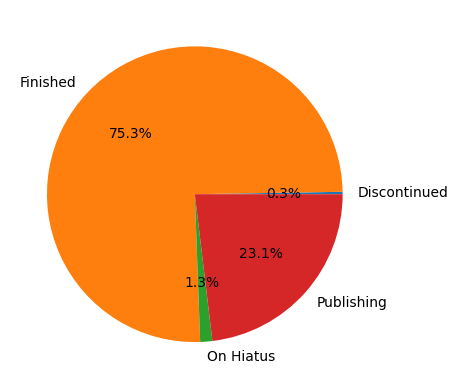

In [30]:
plt.pie(manga_df.groupby('Status')['Status'].count().values, labels=manga_df.groupby('Status')['Status'].count().index, autopct = '%.1f%%');

The most frequently appearing **`Author`** is Tezuka, Osamu (Story & Art)

In [31]:
manga_df[['Author']].mode()

,Author
0,"Tezuka, Osamu (Story & Art)"


### Considering columns of type list:  `Genres`, `Themes`

With the columns representing the classification and each row in that column will be a list (combination of classifications), we will concatenate the lists (in each column) together and use unique to calculate the `diff_vals` for each column, `num_diff_vals` will be the length of the calculated `diff_vals` and `missing_ratio` will be the ratio of rows with empty lists for each column

In [32]:
list_col_dist_df = pd.DataFrame({'Genres': [.0] * 3,
                                 'Themes': [.0] * 3},
                                  index=['Missing_ratio', 'Num_diff_vals', 'Diff_vals'], dtype=object)

list_col_dist_df.loc['Missing_ratio'] = \
    np.sum(manga_df[list_col_dist_df.columns].apply(lambda col: col.apply(len)) == 0) / manga_df.shape[0] * 100

list_col_dist_df.loc['Diff_vals'][['Genres', 'Themes']] = \
    manga_df[list_col_dist_df.columns].apply(np.concatenate)[['Genres', 'Themes']].apply(np.unique)

list_col_dist_df.loc['Num_diff_vals'][['Genres', 'Themes']] = list_col_dist_df.loc['Diff_vals'][['Genres', 'Themes']].apply(len)

list_col_dist_df

C:\Users\Admin\anaconda3\envs\min_ds-env\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,Genres,Themes
Missing_ratio,23.7,77.24
Num_diff_vals,19,52
Diff_vals,"[Action, Adventure, Avant Garde, Award Winning...","[Adult Cast, Anthropomorphic, CGDCT, Childcare..."


*General view:*

+ About Missing_ratio:
     + `Genres` is missing a lot of data, missing **23.7%** of the data
     + `Themes` is missing a lot of data, up to **77.24%** of the data
    
+ About Num_diff_vals, Diff_vals:
     + `Genres` has 19 types
     + `Themes` has 52 types

The missing data rate of the `Themes` column is 77.24% (greater than 75%), so we will proceed to remove this column from the data.

In [33]:
manga_df = manga_df.drop(columns='Themes')

Let's chekc data after deleting columns `Themes`

In [34]:
manga_df.head(2)

,Title,Score,Vote,Ranked,Popularity,Members,Favorite,Volumes,Chapters,Status,Genres,Author,Recommended,Mixed Feelings,Not Recommended,Release date,Completed date
0,Berserk,9.47,330815,1,1,664507,122709,6.0,35.0,Publishing,"[Action, Adventure, Award Winning, Drama, Fant...","Miura, Kentarou (Story & Art), Studio Gaga (Art)",233,15,10,1989-08-25,NaT
1,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,9.30,156218,2,26,255895,42837,24.0,96.0,Finished,"[Action, Adventure, Mystery, Supernatural]","Araki, Hirohiko (Story & Art)",120,7,1,2004-01-19,2011-04-19


**`Genres`** Romance is the most popular genre, accounting for 13.9% (based on the number of appearances in all column lists)

In [35]:
genres, counts_genres = np.unique(pd.Series(np.concatenate(manga_df['Genres'])), return_counts=True)
genres[counts_genres.argmax()], counts_genres[counts_genres.argmax()] / np.sum(counts_genres) * 100

('Romance', 13.899184581171237)